<a href="https://colab.research.google.com/github/shaon11579/DNN-fall-2021/blob/main/8740_eural_network_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

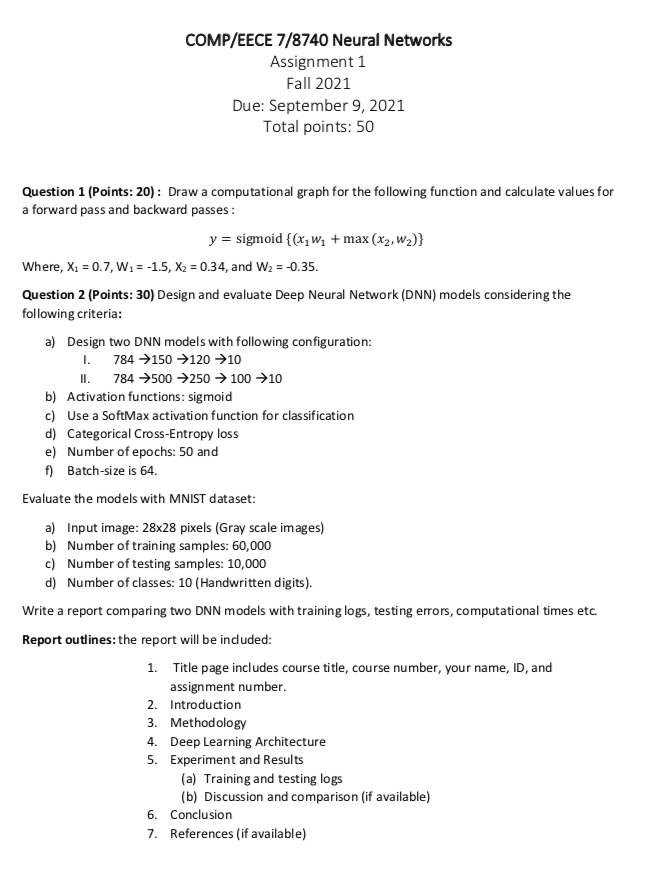

[link text](https://)

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
def Sigmoid(Z):
    return 1/(1+np.exp(-Z))
def Relu(Z):
    return np.maximum(0,Z)
def forward(self):    
        Z1 = self.param['W1'].dot(self.X) + self.param['b1'] 
        A1 = Relu(Z1)
        self.ch['Z1'],self.ch['A1']=Z1,A1
        
        Z2 = self.param['W2'].dot(A1) + self.param['b2']  
        A2 = Sigmoid(Z2)
        self.ch['Z2'],self.ch['A2']=Z2,A2
        self.Yh=A2
        loss=self.nloss(A2)
        return self.Yh, loss

In [4]:

def dSigmoid(Z):
    s = 1/(1+np.exp(-Z))
    dZ = s * (1-s)
    return dZ
def backward(self):
        dLoss_Yh = - (np.divide(self.Y, self.Yh ) - np.divide(1 - self.Y, 1 - self.Yh))    
        
        dLoss_Z2 = dLoss_Yh * dSigmoid(self.ch['Z2'])    
        dLoss_A1 = np.dot(self.param["W2"].T,dLoss_Z2)
        dLoss_W2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2,self.ch['A1'].T)
        dLoss_b2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1],1])) 
                            
        dLoss_Z1 = dLoss_A1 * dRelu(self.ch['Z1'])        
        dLoss_A0 = np.dot(self.param["W1"].T,dLoss_Z1)
        dLoss_W1 = 1./self.X.shape[1] * np.dot(dLoss_Z1,self.X.T)
        dLoss_b1 = 1./self.X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1],1]))  
        
        self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1
        self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1
        self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2
        self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2

In [9]:
import numpy

def sigmoid(sop):
    return 1.0 / (1 + numpy.exp(-1 * sop))

def error(predicted, target):
    return numpy.power(predicted - target, 2)

def error_predicted_deriv(predicted, target):
    return 2 * (predicted - target)

def activation_sop_deriv(sop):
    return sigmoid(sop) * (1.0 - sigmoid(sop))

def sop_w_deriv(x):
    return x

def update_w(w, grad, learning_rate):
    return w - learning_rate * grad

x1 = 0.7
x2=0.34
w1=-1.5
w2= -0.35


for k in range(10):
    # Forward Pass
    y = w1 * x1+ w2*x2
    predicted = sigmoid(y)
    err = error(predicted, target)

    # Backward Pass
    g1 = error_predicted_deriv(predicted, target)

    g2 = activation_sop_deriv(predicted)

    g3 = sop_w_deriv(x)

    grad = g3 * g2 * g1
    print(predicted)

    

0.23703578653599017
0.23703578653599017
0.23703578653599017
0.23703578653599017
0.23703578653599017
0.23703578653599017
0.23703578653599017
0.23703578653599017
0.23703578653599017
0.23703578653599017


In [5]:
import numpy as np
import numpy.matlib

class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.001
        self.bias = np.matlib.randn((1, output_dim)) * 0.001
        
    # 𝑦 = sigmoid⁡{(𝑥1𝑤1 + max⁡(𝑥2, 𝑤2)}
    #Where, X1 = 0.7, W1 = -1.5, X2 = 0.34, and W2 = -0.35.
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def getParameters(self):
        return [self.weight, self.bias]

# Let's test the composition of the two functions (forward-propagation in the neural network).
x1 = np.array([[0.7,X2 = 0.34]])
a1 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x1))
print('x[1] = '+ str(x1))
print('a[1] = ' + str(a1))

# Let's test the composition of the two functions (forward-propagation in the neural network).
x2 = np.array([[4, 5, 2, 1]])
a2 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x2))
print('x[2] = '+ str(x2))
print('a[2] = ' + str(a2))

# We can also compute both at once, which could be more efficient since it requires a single matrix multiplication.
x = np.concatenate((x1, x2), axis = 0)
a = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x))
print('x = ' + str(x))
print('a = ' + str(a))

SyntaxError: ignored

In [4]:
import numpy as np
import numpy.matlib
w = [2,-3,-3] # assume some random weights and data
x = [-1, -2]

# forward pass
dot = w[0]*x[0] + w[1]*x[1] + w[2]
f = 1.0 / (1 + math.exp(-dot)) # sigmoid function

# backward pass through the neuron (backpropagation)
ddot = (1 - f) * f # gradient on dot variable, using the sigmoid gradient derivation
dx = [w[0] * ddot, w[1] * ddot] # backprop into x
dw = [x[0] * ddot, x[1] * ddot, 1.0 * ddot] # backprop into w
# we're done! we have the gradients on the inputs to the circuit

NameError: ignored

In [2]:
import sys 
import numpy as np 
import matplotlib 


In [3]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [11]:
# Hyperparameters for our network
#source: https://towardsdatascience.com/building-neural-network-using-pytorch-84f6e75f9a
input_size = 784
hidden_sizes = [150, 120]
output_size = 10
# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=150, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=150, out_features=120, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=120, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [7]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [500, 250]
hidden_sizes2 = [250,100]
output_size = 10
# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Sigmoid(),
                      nn.Softmax(dim=1),
                      nn.batch_size=64,
                      nn.epochs=50)
                    
print(model)

SyntaxError: ignored

In [5]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))

model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [7]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
# Define the loss
criterion = nn.NLLLoss()
# Optimizers require the parameters to optimize and a learning rate

 optimizer = optim.SGD(model.parameters(), lr=0.003)
 
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

IndentationError: ignored

Question 2 part B: Evaluate MNIST data, Write a report comparing two DNN models with training logs, testing errors, computational times etc.


11501568/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


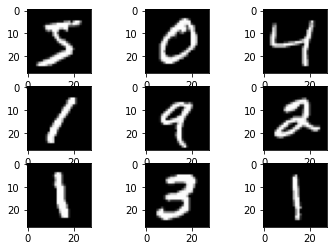

In [ ]:

# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:

history = model.fit(..., validation_data=(valX, valY))

NameError: ignored

In [ ]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [ ]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

NameError: ignored

In [ ]:
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [ ]:
# scale pixels
def prep_pixels(train, test):
# convert from integers to floats
train_norm = train.astype('float32')
test_norm = test.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

IndentationError: ignored

In [38]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [40]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [41]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [42]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [43]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [44]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

In [ ]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)


11501568/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


> 98.575
> 98.700
> 98.492
> 98.925
> 98.800


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


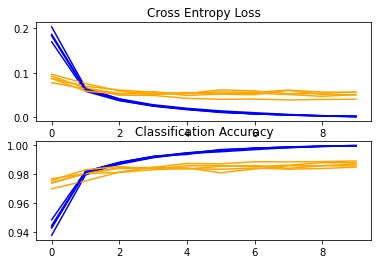

Accuracy: mean=98.698 std=0.155, n=5


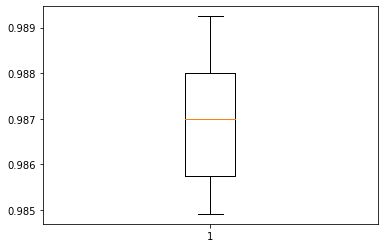

In [ ]:
# entry point, run the test harness
run_test_harness()

In [1]:


# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [2]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

Question 2 solution 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

from tensorflow import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.optimizers import Adam ,RMSprop
from keras import  backend as K


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


from subprocess import check_output



# Any results you write to the current directory are saved as output.

In [2]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

11501568/11490434 [==============================] - 0s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


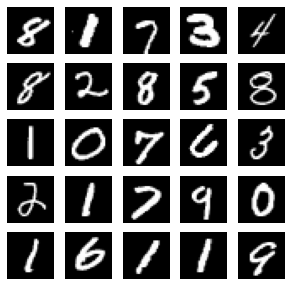

In [3]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

In [5]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [6]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size
print(x_train.shape)

(60000, 28, 28)


In [8]:
print(x_test.shape)

(10000, 28, 28)


In [9]:
print(y_train.shape)

(60000, 10)


In [10]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [11]:
# network parameters
batch_size = 64
epochs=50
hidden_units = [784,150,120,10]


In [12]:
# model is a 3-layer MLP with sigmoid and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units[0], input_dim=input_size))
model.add(Activation('sigmoid'))
model.add(Dense(hidden_units[1]))
model.add(Activation('sigmoid'))
model.add(Dense(hidden_units[2]))
model.add(Activation('sigmoid'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [13]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
activation (Activation)      (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               117750    
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               18120     
_________________________________________________________________
activation_2 (Activation)    (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

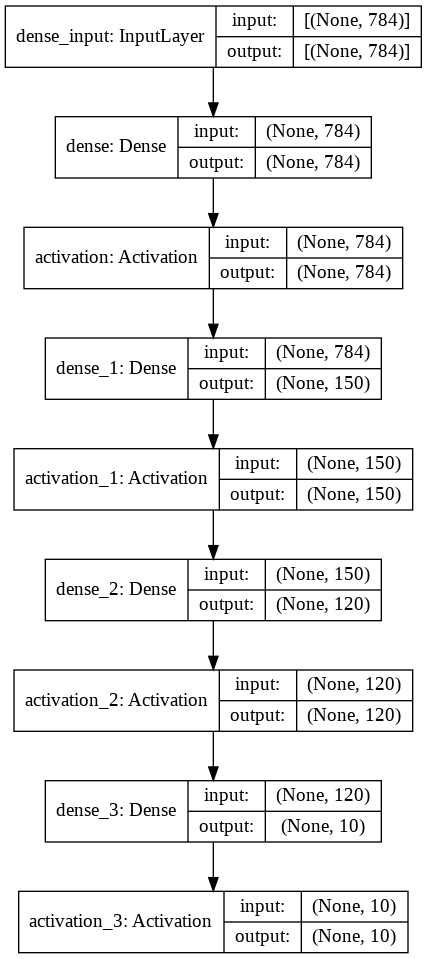

In [14]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [15]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
t0=time()

NameError: ignored

In [17]:
import time 
t0=time.time()
history=model.fit(x_train, y_train, epochs=50, batch_size=batch_size)
t1=time.time()



Epoch 1/50
938/938 [==============================] - 6s 4ms/step - loss: 0.4790 - accuracy: 0.8634
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1640 - accuracy: 0.9506
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.1082 - accuracy: 0.9679
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0775 - accuracy: 0.9764
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0593 - accuracy: 0.9819
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0449 - accuracy: 0.9858
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0350 - accuracy: 0.9892
Epoch 8/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0260 - accuracy: 0.9919
Epoch 9/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0220 - accuracy: 0.9933
Epoch 10/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0175 - accuracy: 0.9945

In [49]:
print(t1-t0)

TypeError: ignored

In [18]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

157/157 [==============================] - 1s 3ms/step - loss: 0.1087 - accuracy: 0.9847

Test accuracy: 98.5%


In [19]:
print(loss)

0.10866453498601913


In [20]:
print(history.history.keys())
print(history.history['accuracy'])

dict_keys(['loss', 'accuracy'])
[0.8634499907493591, 0.9506000280380249, 0.9679499864578247, 0.9763666391372681, 0.9818999767303467, 0.9857666492462158, 0.989216685295105, 0.9919000267982483, 0.993316650390625, 0.9945166707038879, 0.9957333207130432, 0.9962499737739563, 0.9972000122070312, 0.996666669845581, 0.9974166750907898, 0.9983000159263611, 0.9974499940872192, 0.9984666705131531, 0.9975833296775818, 0.9987999796867371, 0.9987499713897705, 0.9994999766349792, 0.9973833560943604, 0.9990166425704956, 0.9993833303451538, 0.9987833499908447, 0.9990000128746033, 0.9990333318710327, 0.9988999962806702, 0.9992499947547913, 0.9987833499908447, 0.9996333122253418, 0.9987833499908447, 0.9995833039283752, 0.9998499751091003, 0.9982500076293945, 0.9997166395187378, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


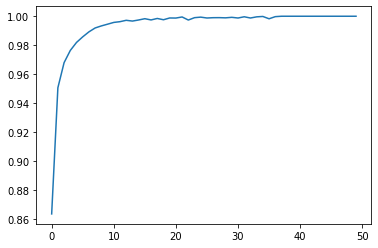

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [22]:
print(history.history['loss'])

[0.47895753383636475, 0.16397793591022491, 0.10823168605566025, 0.07749097049236298, 0.05932042375206947, 0.04485457018017769, 0.035002291202545166, 0.026006590574979782, 0.022027553990483284, 0.01754310354590416, 0.013787363655865192, 0.011824646033346653, 0.009883846156299114, 0.009935918264091015, 0.008284679614007473, 0.006196841597557068, 0.007361419964581728, 0.004916995298117399, 0.006891120690852404, 0.0038708120118826628, 0.004052984993904829, 0.0018427360337227583, 0.007575249765068293, 0.003474165452644229, 0.0022578120697289705, 0.003571922890841961, 0.003439163789153099, 0.0030570782255381346, 0.0038884258829057217, 0.0025630134623497725, 0.00359713239595294, 0.0014359381748363376, 0.004233344458043575, 0.0014550823252648115, 0.0006383252330124378, 0.005644793622195721, 0.001089380937628448, 5.1155158871551976e-05, 2.5025376089615747e-05, 1.80638198798988e-05, 1.3363663128984626e-05, 9.740372661326546e-06, 7.081298008415615e-06, 5.086912096885499e-06, 3.5950045003119158e-0

II. 784 →500 →250 → 100 →10
b) Activation functions: sigmoid
c) Use a SoftMax activation function for classification
d) Categorical Cross-Entropy loss
e) Number of epochs: 50 and
f) Batch-size is 64.
Evaluate the models with MNIST dataset:
a) Input image: 28x28 pixels (Gray scale images)
b) Number of training samples: 60,000
c) Number of testing samples: 10,000
d) Number of classes: 10 (Handwritten digits).

Solution to Q2 part b 


In [23]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [24]:
# network parameters
batch_size = 64
epochs=50
hidden_units = [784,500,250,100,10]

In [25]:
# model is a 3-layer MLP with sigmoid and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units[0], input_dim=input_size))
model.add(Activation('sigmoid'))
model.add(Dense(hidden_units[1]))
model.add(Activation('sigmoid'))
model.add(Dense(hidden_units[2]))
model.add(Activation('sigmoid'))
model.add(Dense(hidden_units[3]))
model.add(Activation('sigmoid'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [26]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
activation_4 (Activation)    (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_5 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 250)               125250    
_________________________________________________________________
activation_6 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)              

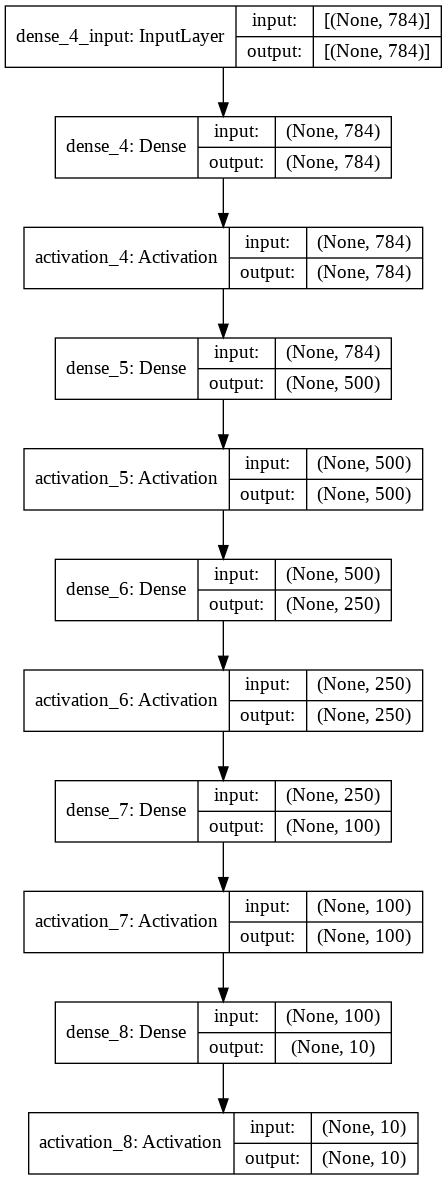

In [27]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [28]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
import time 
t0=time.time()
history=model.fit(x_train, y_train, epochs=50, batch_size=batch_size)
t1=time.time()

Epoch 1/50
938/938 [==============================] - 5s 5ms/step - loss: 2.3096 - accuracy: 0.1043
Epoch 2/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3054 - accuracy: 0.1067
Epoch 3/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3044 - accuracy: 0.1080
Epoch 4/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3034 - accuracy: 0.1078
Epoch 5/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3030 - accuracy: 0.1087
Epoch 6/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3026 - accuracy: 0.1081
Epoch 7/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3025 - accuracy: 0.1091
Epoch 8/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3024 - accuracy: 0.1080
Epoch 9/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3023 - accuracy: 0.1104
Epoch 10/50
938/938 [==============================] - 4s 5ms/step - loss: 2.3025 - accuracy: 0.1098

In [30]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

157/157 [==============================] - 1s 4ms/step - loss: 2.3017 - accuracy: 0.1028

Test accuracy: 10.3%


In [31]:
print(loss)

2.301724433898926


In [32]:
print(history.history.keys())
print(history.history['accuracy'])

dict_keys(['loss', 'accuracy'])
[0.10433333367109299, 0.1066666692495346, 0.10796666890382767, 0.10778333246707916, 0.10869999974966049, 0.10809999704360962, 0.1091499999165535, 0.10801666975021362, 0.11041666567325592, 0.10978333652019501, 0.11078333109617233, 0.10980000346899033, 0.11053333431482315, 0.11088333278894424, 0.11073333024978638, 0.1096833348274231, 0.11068333685398102, 0.10956666618585587, 0.10961666703224182, 0.11106666922569275, 0.11029999703168869, 0.1114666685461998, 0.11086666584014893, 0.11136666685342789, 0.11083333194255829, 0.11044999957084656, 0.11033333092927933, 0.10993333160877228, 0.10988333076238632, 0.10961666703224182, 0.11001666635274887, 0.11150000244379044, 0.11006666719913483, 0.11079999804496765, 0.10921666771173477, 0.11034999787807465, 0.11023333668708801, 0.1105833351612091, 0.1096000000834465, 0.11056666821241379, 0.11041666567325592, 0.10918333381414413, 0.10893333703279495, 0.11063333600759506, 0.10989999771118164, 0.10909999907016754, 0.10986

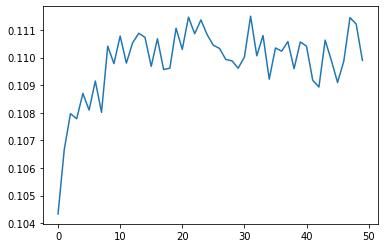

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [34]:
print(history.history['loss'])

[2.309640407562256, 2.3053700923919678, 2.304392099380493, 2.3033714294433594, 2.3029582500457764, 2.3025927543640137, 2.3025169372558594, 2.3023927211761475, 2.3022680282592773, 2.302532434463501, 2.3021676540374756, 2.3021674156188965, 2.3022918701171875, 2.302063226699829, 2.302135467529297, 2.3023221492767334, 2.3022923469543457, 2.3019888401031494, 2.3022122383117676, 2.302215337753296, 2.30236554145813, 2.30222749710083, 2.301957845687866, 2.3021655082702637, 2.302241086959839, 2.3020617961883545, 2.3021280765533447, 2.3022639751434326, 2.302122116088867, 2.30206298828125, 2.3022429943084717, 2.302258014678955, 2.302260398864746, 2.3021020889282227, 2.3022005558013916, 2.302215576171875, 2.3020870685577393, 2.3021626472473145, 2.302288293838501, 2.3021252155303955, 2.302250623703003, 2.302039623260498, 2.302077293395996, 2.3022611141204834, 2.302088975906372, 2.3022048473358154, 2.302084445953369, 2.3022284507751465, 2.302309274673462, 2.302297830581665]


In [35]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

In [36]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


> 98.558
> 98.642
> 98.583
> 98.950
> 98.667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


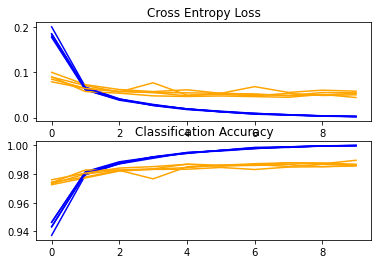

Accuracy: mean=98.680 std=0.140, n=5


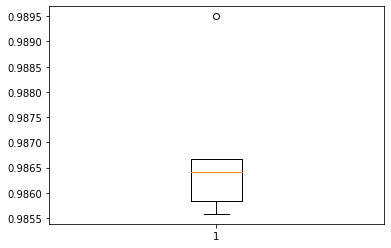

In [45]:
# entry point, run the test harness
run_test_harness()